In [1]:
import pandas as pd
df = pd.read_csv('forestfires.csv')
print(df['month'].unique())

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']


In [3]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

In [4]:
df['fire_occured'] = df['area'].apply(lambda x:1 if x>0 else 0)

In [6]:
fires_per_month = df.groupby('month')['fire_occured'].sum().reset_index()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5052\2399002105.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fires_per_month = df.groupby('month')['fire_occured'].sum().reset_index()


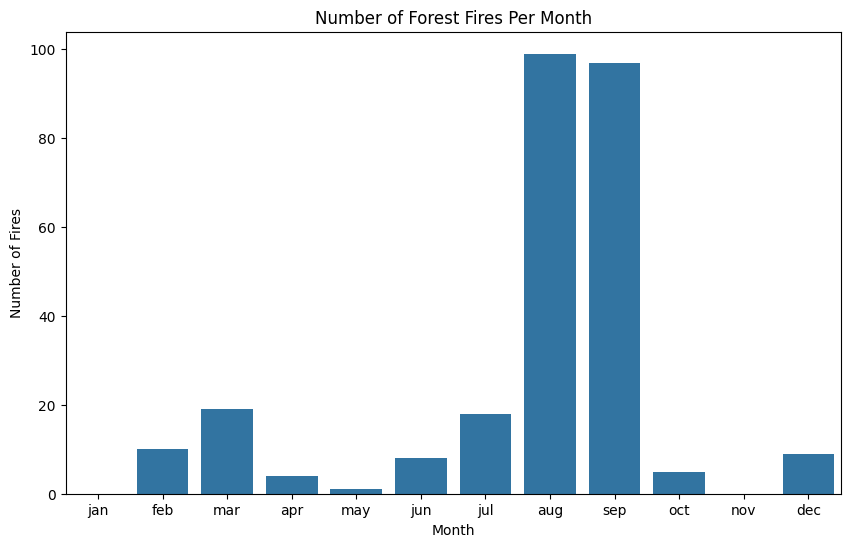

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=fires_per_month, x='month', y='fire_occured')
plt.title('Number of Forest Fires Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.show()

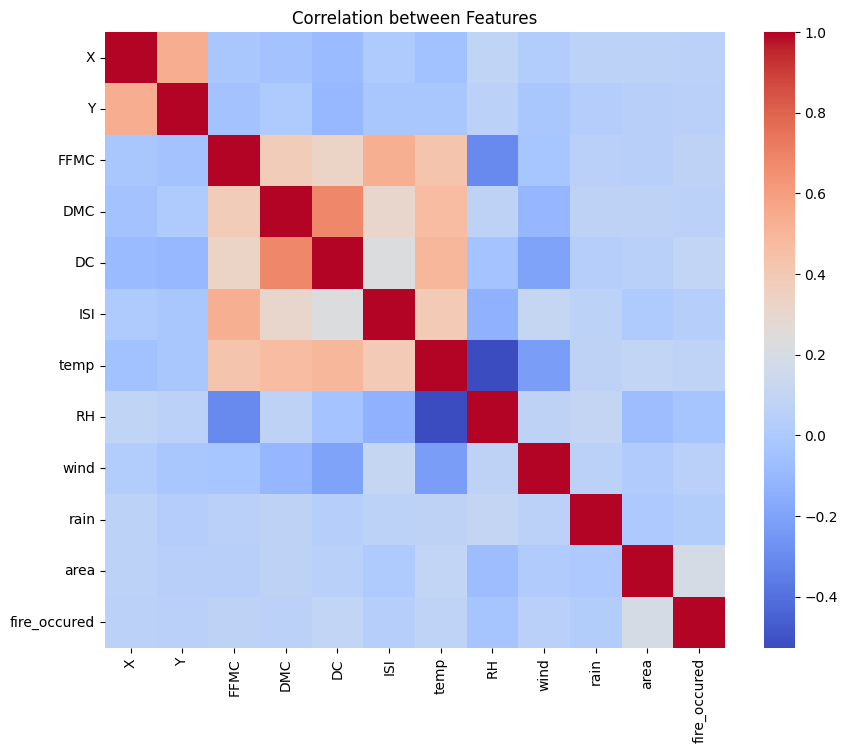

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()

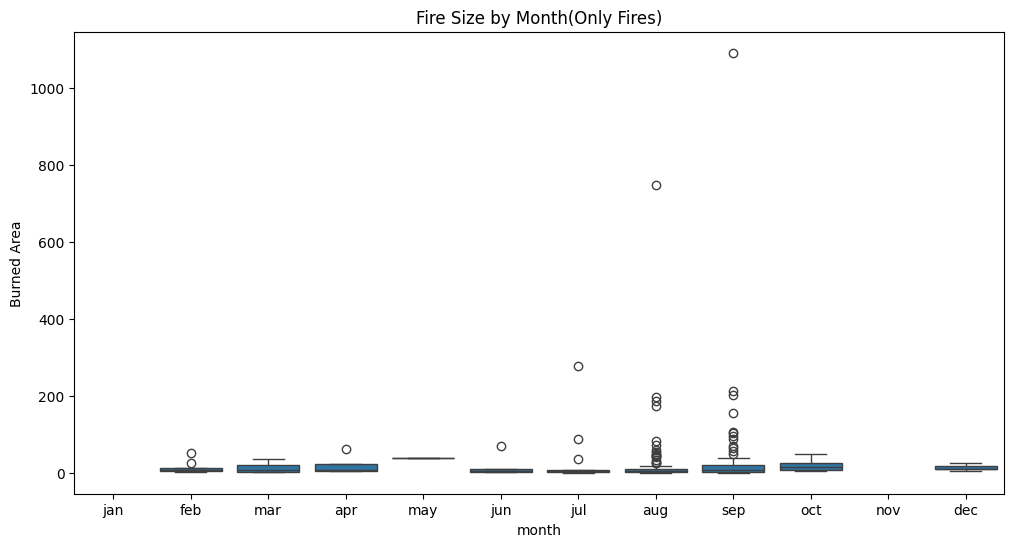

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['area']>0], x='month', y='area')
plt.title('Fire Size by Month(Only Fires)')
plt.ylabel('Burned Area')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df['month'] = pd.Categorical(df['month']).codes
df['day'] = pd.Categorical(df['day']).codes
X = df[['month', 'day', 'FFMC', 'DMC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
y = df['fire_occured']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Report: ', classification_report(y_test, y_pred))

Accuracy:  0.5673076923076923
Report:                precision    recall  f1-score   support

           0       0.56      0.59      0.57        51
           1       0.58      0.55      0.56        53

    accuracy                           0.57       104
   macro avg       0.57      0.57      0.57       104
weighted avg       0.57      0.57      0.57       104

